In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
datos0= [[1, 1, 1],
        [2, 1, 1],
        [2, 2, 1],
        [1, 3, 1],
        [-1, 1, -1],
        [0, 2, -1],
        [-1, 3, -1]]

datos=pd.DataFrame (datos0)
datos.columns = ['x1', 'x2', 'd(x)']

In [3]:
datos

,x1,x2,d(x)
0,1,1,1
1,2,1,1
2,2,2,1
3,1,3,1
4,-1,1,-1
5,0,2,-1
6,-1,3,-1


In [4]:
X = MinMaxScaler().fit_transform (datos[['x1','x2']])
d = datos['d(x)'].values
print(X.shape)
print(d.shape)


(7, 2)
(7,)


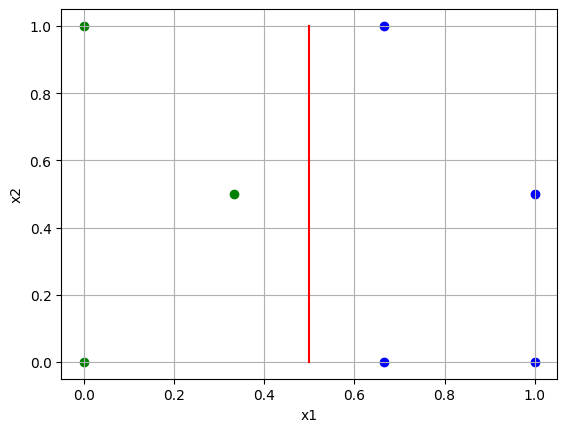

In [5]:
import matplotlib.pyplot as plt
plt.scatter (X[np.argwhere(d==1), 0], X[np.argwhere (d==1), 1], c='blue')#1 o -1,, 01
plt.scatter (X[np.argwhere(d==-1), 0], X[np.argwhere (d==-1), 1], c='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
#hacer la recta
plt.plot([0.5,0.5], [0,1], c='red')
plt.show ()

In [6]:

class perceptron_simple ():
    def __init__ (self, n_inputs=2, n_outputs=1, W=None, b=None):
        #autoasigno
        self.n_inputs = n_inputs
        self.n_output = n_outputs
        self.W = W
        self.b = b
        
        
        if self.W is None:
            self.W = np.random.rand (self.n_outputs, self.n_inputs) - 0.5# si es nulo aleatorio entre e/s
        if self.b is None:
            self.b = np.random.rand (self.n_outputs, 1) - 0.5#si es nulo aleatorio entre salidas,1
    def predict (self, x):
        return np.sign (self.W @ x.T + self.b).T.astype(int)# w y b con la x
    def train (self, X, D):
        if np.sum (self.predict (X) == D) != D.shape [0]:# si sumo las predicciones y d no es 0. sum(pred correctas)=d
            continuar = True
            p = 0
            while continuar:
                v = p % X.shape [0]#modulo
                x = X[v].reshape (1, -1)# del sitio x posicion v con reshape
                y = self.predict (x)#prediccion
                d = D[v].reshape (1, -1)
                if y != d:# si y noes igual a d
                    self.W += d*x
                    self.b += d
                    # Después de ajustar los pesos, vemos si el 
                    # modelo ya es el corrrecto
                    SalModelo=self.predict (X)#otra precidicon
                    print ("Iteración #{:02d}".format(p), "\tTodas las Salidas producidas:", SalModelo.T)
                    print ("\t\tTodas las Salidas deseadas:  ", D.T)
                    if np.sum (self.predict (X) == D) == D.shape [0]:# si las predicciones es igual tamano paro
                        continuar = False
                p += 1
        return
    def get_params (self):
        return self.W, self.b

In [7]:
w = np.array ([0.75, 1.]).reshape (1,2)#aaray de 2 
print(w)
B = np.array ([-3]).reshape (1,1)
ps = perceptron_simple (n_inputs=2, n_outputs = 1, W=w, b=B)

[[0.75 1.  ]]


In [8]:
ps.train(X, d.reshape (-1,1))

Iteración #00 	Todas las Salidas producidas: [[-1 -1 -1 -1 -1 -1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #01 	Todas las Salidas producidas: [[ 1  1  1  1 -1  1  0]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #05 	Todas las Salidas producidas: [[-1  1  1 -1 -1 -1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #07 	Todas las Salidas producidas: [[ 1  1  1  1 -1  1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #12 	Todas las Salidas producidas: [[-1  1  1 -1 -1 -1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #14 	Todas las Salidas producidas: [[ 1  1  1  1 -1  1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #19 	Todas las Salidas producidas: [[-1  1  1 -1 -1 -1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  1  1 -1 -1 -1]]
Iteración #21 	Todas las Salidas producidas: [[ 1  1  1  1 -1 -1 -1]]
		Todas las Salidas deseadas:   [[ 1  1  

In [9]:
pesos, bias = ps.get_params()

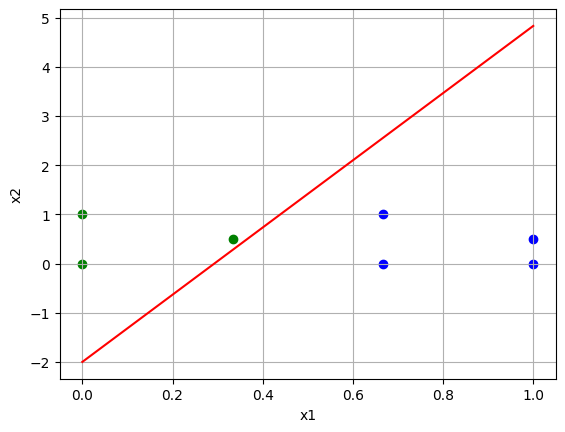

In [10]:
plt.scatter (X[np.argwhere(d==1), 0], X[np.argwhere(d==1), 1], c='blue')
plt.scatter (X[np.argwhere(d==-1), 0], X[np.argwhere(d==-1), 1], c='green')
plt.xlabel ('x1')
plt.ylabel ('x2')
plt.xlim=((0,1))
plt.ylim=((0,1))
plt.grid ()
x1= np.array([0.0, 1.0])
x2= np.array([-bias[0,0]/pesos[0,1], (-bias [0,0]-pesos [0,0])/pesos[0,1] ])
plt.plot (x1, x2, c='red')
plt.show()

# Adaline

In [11]:
dataset = pd.read_csv('boston.csv')

In [12]:
dataset=dataset.dropna(subset=["MEDV"]).reset_index(drop=True)#eliminas los na

In [28]:
y=dataset["MEDV"]

In [29]:
X=dataset.drop(columns=["MEDV"])#eliminas la columnua

In [30]:
scaler = MinMaxScaler ()

In [31]:
X = scaler.fit_transform(X)#solo el x

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold
K = 10
skf = StratifiedKFold (n_splits=K)#validacion stratificada

In [32]:
from sklearn.linear_model import  SGDRegressor

In [33]:
from sklearn import preprocessing
clase=preprocessing.LabelEncoder()
clase.fit(np.unique(y))# guardo las etiqueitas
y_auxiliar=clase.transform(y)#transformo
#conviertes path, foliage a 1,2

In [35]:
r_class = pd.DataFrame (columns=['Fold', 'aciertos',"R2"])# pongo las columnas estas

In [52]:

k=0
for train_index,test_index in skf.split(X, y_auxiliar):
    error=pd.DataFrame(columns=["Real","Predicho","Error","Error relativo"])

    #SGD predicion
    regr = SGDRegressor(max_iter=5000, tol=1e-5, random_state=20)
    regr.fit(X[train_index],y[train_index])
    prediciones=regr.predict(X[test_index])



    #error
    error["Real"]=y[test_index]
    error["Predicho"]=prediciones
    error["Error"]=abs(error["Real"]-error["Predicho"])
    error["Error relativo"]=(error["Error"]/error["Real"])*100
    porcentaje=error.apply(lambda x: x['Error relativo'] < 15, axis=1).sum()/len(error)#mayores de 15 los cuentas
    

    r_class.loc[k]=[k,porcentaje,regr.score(X[test_index],y[test_index])]
    k+=1

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [53]:
r_class

,Fold,aciertos,R2
0,0,0.717391,0.826068
1,1,0.630435,0.757883
2,2,0.622222,0.588573
3,3,0.555556,0.796888
4,4,0.644444,0.855750
5,5,0.777778,0.668170
6,6,0.666667,0.634983
7,7,0.622222,0.716296
8,8,0.666667,0.622011
9,9,0.6,0.558442
